In [9]:
import tensorflow as tf
import keras
from keras import layers

tf.random.set_seed(22)

In [3]:
import json
import numpy as np
import pandas as pd
from time import time
import random
import matplotlib.pyplot as plt

In [4]:
name_model = "MDistMAngBold-MP50"
with open(f"./dataset/json/{name_model}.json", "r") as f:
    dataset = json.load(f)

In [5]:
print("Первый x:\n", dataset["x"][0])
print("Последний, x:\n", dataset["x"][-1])
print("Размер x:\t", len(dataset["x"][0]))
print("Первый y:\t", dataset["y"][0])
print("Последний y:\t", dataset["y"][0])
print("Кол-во записей:\t", len(dataset["x"]))

Первый x:
 [0.003505522964632402, 0.0014022091858529608, 0.0028044183717059216, 0.0007011045929264804, 0.0002395976311308524, 0.0007011045929264804, 0.0, 0.0007011045929264804, 0.0007011045929264804, 0.0, 0.0028044183717059216, 0.003505522964632402, 0.0028044183717059216, 0.0, 0.0007011045929264804, 0.0002395976311308524, 0.0007007154146600641, 0.0007011045929264804, 0.0028044183717059216, 0.0028044183717059216, 0.0014022091858529608, 0.0, 0.0005168221533895105, 0.0007007154146600641, 0.00040205708350351643, 0.0, 0.0007011045929264804, 0.0028044183717059216, 0.0028044183717059216, 0.0014022091858529608, 0.0, 0.0005168221533895105, 0.0007007154146600641, 0.00040205708350351643, 0.0, 0.0007011045929264804, 0.0, 0.0028044183717059216, 0.0028044183717059216, 0.0, 0.0, 0.0007007154146600641, 0.0005168221533895105, 0.0, 0.0007011045929264804, 0.0, 0.0028044183717059216, 0.0028044183717059216, 0.0028044183717059216, 0.0, 0.0007001355467232947, 0.0003357254281527811, 0.0007007154146600641, 0.0

In [167]:
def get_data(dataset): #, batch_size=128

    X = np.array(dataset["x"])
    y = np.array(dataset["y"])
    
    keys = np.unique(y)
    Y_keys = dict()
    for i, key in enumerate(keys):
        z = np.zeros(5)
        z[i] = 1
        Y_keys[key] = z
    Y = np.array([Y_keys[yi] for yi in y])

    X_clus_list = []
    Y_clus_list = []
    # for key, item in Y_keys.items():
        # X_clus_list.append(X[Y==item,:])
        # Y_clus_list.append(Y[Y==item])

    for i, item in enumerate(Y_keys.keys()):
        X_clus_list.append(X[Y[:,i]==1,:])
        Y_clus_list.append(Y[Y[:,i]==1,:])
        

    balans_len = [len(yc) for yc in Y_clus_list]
    min_len = min(balans_len)


    X = np.concatenate([xc[:min_len] for xc in X_clus_list])
    Y = np.concatenate([yc[:min_len] for yc in Y_clus_list])

    # X.dtype = "float64"
    # Y.dtype = "int64"
    data = [(x, y) for x, y in zip(X, Y)]
    random.shuffle(data)
    # data_batch = []
    # for i in range(0, len(X)-len(X)%batch_size, batch_size):
    #     x = [x for x, y in data[i:i+batch_size]]
    #     y = [y for x, y in data[i:i+batch_size]]
    #     data_batch.append([np.array(x, dtype="float32"), np.array(y)])
    # print(data_batch[0][0].shape)
    # data = [(tf.reshape(x, shape=[-1, 100]),tf.reshape(y, shape=[-1, 1]) ) for x, y in zip(X, Y)]
    
    
    # len_data = len(data_batch)
    # len_test = round(len_data*0.2)
    # len_val = round((len_data-len_test)*0.2)
    # len_train = len_data-len_test-len_val
    # print(len_data, ":", len_train, len_val, len_test)
    
    # train_data, val_data = data_batch[:len_train], data_batch[len_train:len_train+len_val]
    # test_data_x = []
    # test_data_y = []
    # for batch in  data_batch[-len_test:]:
    #     for x in batch[0]:
    #         test_data_x.append(x)
    #     for y in batch[1]:
    #         test_data_y.append(y)
    # test_data = [test_data_x, test_data_y]     
    # return train_data, val_data,test_data, Y_keys

    len_data = len(data)
    len_test = round(0.2*len_data)
    len_val = round((len_data-len_test)*0.2)
    len_train = len_data - len_test - len_val
    
    train_x = np.array([x for x, y in data[:len_train]])
    train_y = np.array([y for x, y in data[:len_train]])
    
    val_x = np.array([x for x, y in data[len_train:len_train+len_val]])
    val_y = np.array([y for x, y in data[len_train:len_train+len_val]])

    test_x = np.array([x for x, y in data[-len_test:]])
    test_y = np.array([y for x, y in data[-len_test:]])
    
    return train_x, train_y, val_x, val_y, test_x, test_y, Y_keys
    

In [177]:
train_x, train_y, val_x, val_y, test_x, test_y, Y_keys = get_data(dataset) #, batch_size=24

In [213]:
model = keras.Sequential()

model.add(layers.Dense(units=450, activation='relu'))
model.add(layers.Dense(units=100,  activation='relu'))
model.add(layers.Dropout(rate=0.8, seed=22))
model.add(layers.Dense(units=100,  activation='relu'))
model.add(layers.Dropout(rate=0.8, seed=22))
model.add(layers.Dense(units=40,  activation='relu'))
model.add(layers.Dense(units=20,  activation='relu'))
model.add(layers.Dense(units=5, activation='softmax'))

In [214]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# model.compile(loss=keras.losses.categorical_crossentropy,
#               optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True))

In [215]:
history = model.fit(train_x, train_y, epochs=42, batch_size=24, validation_data=(val_x, val_y))

Epoch 1/42
134/134 [==============================] - 1s 4ms/step - loss: 1.6002 - accuracy: 0.2314 - val_loss: 1.5642 - val_accuracy: 0.3559
Epoch 2/42
134/134 [==============================] - 0s 3ms/step - loss: 1.4804 - accuracy: 0.3616 - val_loss: 1.3911 - val_accuracy: 0.3546
Epoch 3/42
134/134 [==============================] - 0s 3ms/step - loss: 1.3800 - accuracy: 0.3726 - val_loss: 1.3438 - val_accuracy: 0.4085
Epoch 4/42
134/134 [==============================] - 0s 3ms/step - loss: 1.3594 - accuracy: 0.3795 - val_loss: 1.3982 - val_accuracy: 0.3609
Epoch 5/42
134/134 [==============================] - 0s 3ms/step - loss: 1.3467 - accuracy: 0.3898 - val_loss: 1.3319 - val_accuracy: 0.4361
Epoch 6/42
134/134 [==============================] - 0s 3ms/step - loss: 1.3348 - accuracy: 0.4054 - val_loss: 1.3238 - val_accuracy: 0.4311
Epoch 7/42
134/134 [==============================] - 0s 3ms/step - loss: 1.3209 - accuracy: 0.4173 - val_loss: 1.3284 - val_accuracy: 0.4712
Epoch 

In [216]:
loss_and_metrics = model.evaluate(test_x, test_y, batch_size=24)
loss_and_metrics

42/42 [==============================] - 0s 1ms/step - loss: 1.1365 - accuracy: 0.5170


[1.1365301609039307, 0.5170340538024902]

In [217]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

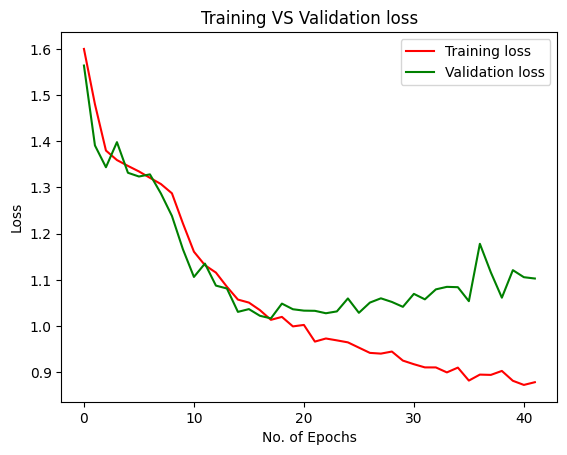

In [218]:
plt.plot(history.history['loss'], 'r', label='Training loss')
plt.plot(history.history['val_loss'], 'g', label='Validation loss')
plt.title('Training VS Validation loss')
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

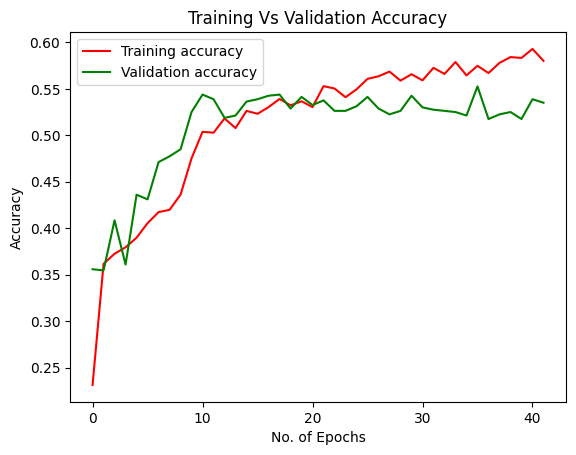

In [219]:
plt.plot(history.history['accuracy'], 'r', label='Training accuracy')
plt.plot(history.history['val_accuracy'], 'g', label='Validation accuracy')
plt.title('Training Vs Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [186]:
class ExportModule(tf.Module):
  def __init__(self, model, preprocess, class_pred):
    # Initialize pre and postprocessing functions
    self.model = model
    self.preprocess = preprocess
    self.class_pred = class_pred

  @tf.function(input_signature=[tf.TensorSpec(shape=[None, 450], dtype=tf.float32)]) 
  def __call__(self, x):
    # Run the ExportModule for new data points
    x = self.preprocess(x)
    y = self.model(x)
    print(y)
    y = self.class_pred(y)
    return y

In [154]:
def preprocess_test(x):
  return x

def class_pred_test(y):
  # Generate class predictions from MLP output
  return tf.argmax(tf.nn.softmax(y), axis=1)

In [156]:
mlp_model_export = ExportModule(model=model,
                                preprocess=preprocess_test,
                                class_pred=class_pred_test)

In [157]:
import os

In [158]:
save_path = name_model
tf.saved_model.save(mlp_model_export, save_path)

Tensor("sequential_8/dense_64/Softmax:0", shape=(None, 5), dtype=float32)
INFO:tensorflow:Assets written to: MDistMAngBold-MP50/assets


INFO:tensorflow:Assets written to: MDistMAngBold-MP50/assets


In [159]:
mlp_loaded = tf.saved_model.load(save_path)

In [164]:
def accuracy_score(y_pred, y):
  # Generic accuracy function
  is_equal = tf.equal(y_pred, y)
  return tf.reduce_mean(tf.cast(is_equal, tf.float32))

test_classes = mlp_loaded(test_x)
test_acc = accuracy_score(test_classes, [np.argmax(y) for y in test_y])
print(f"Test Accuracy: {test_acc:.3f}")

Test Accuracy: 0.578
